In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.imdb.com/list/ls051601789/"
page = requests.get(url)

soup = BeautifulSoup(page.content)

In [2]:
name = soup.find_all("h3", class_="lister-item-header")
movies_name = []
for i in name:
    for j in i.find_all("a"):
        movies_name.append(j.text)

year = soup.find_all("span",class_="lister-item-year text-muted unbold")
year_of_release = []
for k in year:
    year_of_release.append(k.text)

rating = soup.find_all("div",class_="ipl-rating-star small")
rating_score = []
for i in rating:
    rating_score.append(float(i.text))

genre = soup.find_all("span",class_="genre")
genre_type = []
for g in genre:
    genre_type.append(g.text)

time = soup.find_all("span",class_="runtime")
Duration = []
for h in time:
    Duration.append(h.text)

netflix_top_100=pd.DataFrame({})
netflix_top_100['Movies_name']=movies_name
netflix_top_100['Year_of_release']=year_of_release
netflix_top_100['Year_of_release'] = netflix_top_100['Year_of_release'].str.replace('(', '').str.replace(')', '').str.replace('I', '')
netflix_top_100['rating_score']=rating_score
netflix_top_100['Duration']=Duration
netflix_top_100['Genre_type']=genre_type
netflix_top_100['Genre_type'] = netflix_top_100['Genre_type'].apply(lambda x: x.strip('\n'))
netflix_top_100

,Movies_name,Year_of_release,rating_score,Duration,Genre_type
0,Pulp Fiction,1994,8.9,154 min,"Crime, Drama"
1,Memento,2000,8.4,113 min,"Mystery, Thriller"
2,Big Fish,2003,8.0,125 min,"Adventure, Drama, Fantasy"
3,The Pianist,2002,8.5,150 min,"Biography, Drama, Music"
4,Reservoir Dogs,1992,8.3,99 min,"Crime, Thriller"
...,...,...,...,...,...
95,Traffic,2000,7.6,147 min,"Crime, Drama, Thriller"
96,Safety Not Guaranteed,2012,6.9,86 min,"Adventure, Comedy, Drama"
97,Super 8,2011,7.0,112 min,"Action, Mystery, Sci-Fi"
98,The Raven,2012,6.4,110 min,"Crime, Mystery, Thriller"


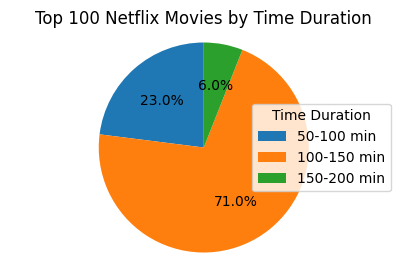

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

if netflix_top_100['Duration'].dtype != int and netflix_top_100['Duration'].dtype != float:
    netflix_top_100['Duration'] = netflix_top_100['Duration'].str.replace(' min', '').astype(int)

netflix_top_100['Time_duration'] = pd.cut(netflix_top_100['Duration'], bins=[50, 100, 150, 200], labels=['50-100 min', '100-150 min', '150-200 min'])

grouped_by_time_duration = netflix_top_100.groupby('Time_duration').size().reset_index(name='Count')

plt.figure(figsize=(5, 3))

sizes = grouped_by_time_duration['Count']

plt.pie(sizes, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Top 100 Netflix Movies by Time Duration')

plt.legend(grouped_by_time_duration['Time_duration'], title='Time Duration', loc='right')

plt.show()